In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import influxdb_client
import scipy

from influxdb_client.client.write_api import SYNCHRONOUS

import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

# configure influxdb client
ORG = "b4mad"
TOKEN = os.environ.get(
    "INFLUXDB_TOKEN",
    "citqAMr66LLb25hvaaZm2LezOc88k2ocOFJcJDR6QB-RmLJa_-sAr9kYB4vSFYaz8bt26lm7SokVgpQKdgKFKA==",
)
URL = "https://telemetry.b4mad.racing/"

# and create the client and a quary api
client = influxdb_client.InfluxDBClient(url=URL, token=TOKEN, org=ORG)
query_api = client.query_api()

session = 1670355905
lap = 2
game = "rFactor2"
car = "Ferrari F2004"
track = "Silverstone"

In [7]:
query = f"""
from(bucket: "racing")
|> range(start: -10y, stop: now())
|> filter(fn: (r) => r["_measurement"] == "laps_cc")
|> filter(fn: (r) => r["SessionId"] == "{session}")
// |> filter(fn: (r) => r["GameName"] == "{game}")
// |> filter(fn: (r) => r["CarModel"] == "{car}")
// |> filter(fn: (r) => r["TrackCode"] == "{track}")
//|> filter(fn: (r) => r["CurrentLap"] == "{lap}")
|> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
|> sort(columns: ["_time"], desc: false)
"""
df = query_api.query_data_frame(org=ORG, query=query)

,result,table,_start,_stop,_time,CarModel,CurrentLap,GameName,SessionId,SessionTypeName,...,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle,WorldPosition_x,WorldPosition_y,WorldPosition_z
0,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:03.989401+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,0.000000,2.0,0.0,6337.86475,34.851917,-0.002867,0.448158,-313.760864,4.803143,-269.635071
1,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:04.097523+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,0.000000,2.0,0.0,6370.70100,35.127490,-0.000600,0.433132,-310.992100,4.791781,-270.341034
2,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:04.206066+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,0.000000,2.0,0.0,6434.25049,35.455530,0.001600,0.366316,-307.113900,4.775630,-271.322327
3,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:04.315624+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,0.000000,2.0,0.0,6621.31543,35.787270,0.001600,0.615140,-303.199677,4.761615,-272.306976
4,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:04.423685+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,0.000000,2.0,0.0,6700.50500,36.417370,-0.000600,1.000000,-299.288574,4.750765,-273.284821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:16.467120+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,611.887146,4.0,0.0,13583.86330,100.055618,-0.093240,0.420579,573.078700,6.420652,-144.357162
116,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:16.575926+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,621.828247,4.0,0.0,13533.25880,99.589720,-0.100000,0.357947,579.897300,6.518006,-137.062729
117,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:16.685426+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,632.708252,4.0,0.0,13423.17380,99.003120,-0.101733,0.376737,587.058700,6.618515,-128.810913
118,_result,0,2012-12-06 09:20:48.470489+00:00,2022-12-06 21:20:48.470489+00:00,2022-12-06 20:45:16.792230+00:00,Reynard 2Ki Ford-Cosworth - Superspeedway,1,Automobilista 2,1670355905,Race,...,643.696100,4.0,0.0,13365.61130,98.431200,-0.102267,0.474895,593.934300,6.721843,-120.190987


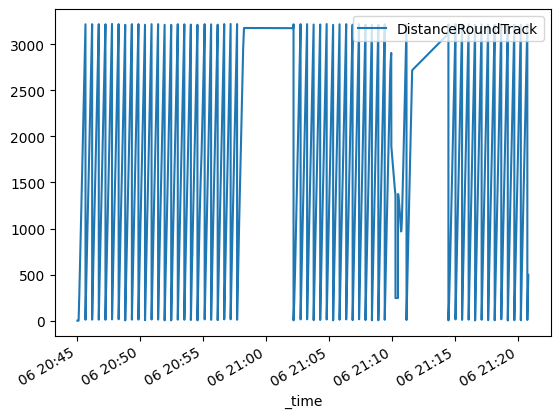

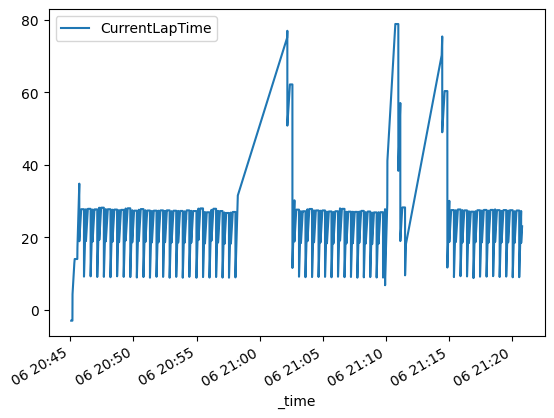

In [8]:
# show only the CurrentLapTime and DistanceOnTrack column
# df[["CurrentLapTime", "DistanceRoundTrack", "CurrentLapTime"]]

# filter CurrentLap == 1
# df[df["CurrentLap"] == "0"]

# convert CurrentLap to int
df["CurrentLap"] = df["CurrentLap"].astype(int)

# plot the CurrentLapTime and DistanceOnTrack column

# plat _time on the x axis and CurrentLapTime and CurrentLap on the y axis
df.plot(x="_time", y=["DistanceRoundTrack"])
df.plot(x="_time", y=["CurrentLapTime"])

df.head(120)

<AxesSubplot:xlabel='WorldPosition_x', ylabel='WorldPosition_y'>

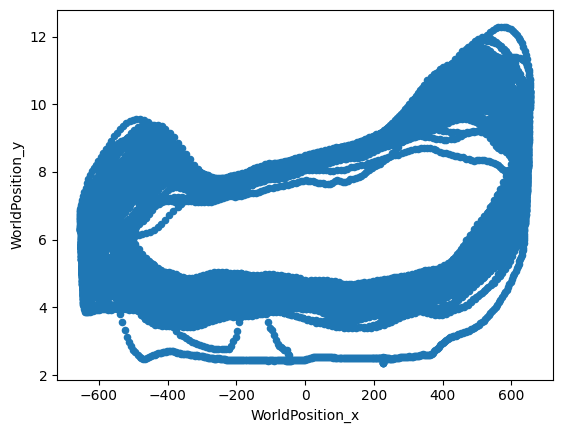

In [16]:
# select CurrentLapTime == 2
# plot WorldPosition_x WorldPosition_x and WorldPosition_z as a 3d plot
df.plot.scatter(x="WorldPosition_x", y="WorldPosition_y")